In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%cd Desktop/

/Users/dzaasgojak/Desktop


In [7]:
data = pd.read_csv("Classeur9.csv", sep=";")
data.head()

,Titre,mois_sortie,annee_sortie,date_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,Scer,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards
0,#No_Filter,5,2023,5 mai 2023,87.0,Epouvante-horreur,Michael Dupret,Hanh McIver,Jasmine Daoud,"1,6",NaN,Belgique,0.0,Anglais,NaN,NaN,NaN
1,10,12,2022,22 décembre 2022,124.0,Drame,Karm Chawla,Viy Rajkumar,Anusha Rangath,NaN,NaN,Inde,0.0,-,NaN,NaN,NaN
2,13 : La comédie musicale,8,2022,12 août 2022,94.0,Drame,Tamra Davis,Eli Golden,Josh Peck,"2,6",Robert Horn,U.S.A.,0.0,Anglais,1.0,NaN,0.0
3,13 Minutes,3,2022,23 mars 2022,NaN,Policier,NaN,Jimmy Waitman,NaN,3,NaN,U.S.A.,0.0,Anglais,NaN,0.0,0.0
4,16 ans,1,2023,4 janvier 2023,94.0,Drame,Philippe Lioret,Sabri Levoye,Teïlo Azaïs,"3,6",Philippe Lioret,France,1.0,Français,4.0,NaN,0.0


In [8]:
moyenne_real_awards = data['real awards'].mean()
data['real awards'] = data['real awards'].fillna(moyenne_real_awards)
data['first actor awards'] = data['first actor awards'].fillna(0)
data['Second actor awards'] = data['Second actor awards'].fillna(0)
data['nomitions	'] = data['nomitions'].fillna(0)
data = data.drop(['Scer'], axis=1)
data = data.drop(['date_sortie'], axis=1)
data = data.dropna()

In [9]:
data.head()

,Titre,mois_sortie,annee_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards,nomitions\t
0,#No_Filter,5,2023,87.0,Epouvante-horreur,Michael Dupret,Hanh McIver,Jasmine Daoud,"1,6",Belgique,0.0,Anglais,2.51369,0.0,0.0,0.0
2,13 : La comédie musicale,8,2022,94.0,Drame,Tamra Davis,Eli Golden,Josh Peck,"2,6",U.S.A.,0.0,Anglais,1.00000,0.0,0.0,0.0
4,16 ans,1,2023,94.0,Drame,Philippe Lioret,Sabri Levoye,Teïlo Azaïs,"3,6",France,1.0,Français,4.00000,0.0,0.0,1.0
5,1UP,7,2022,100.0,Comédie,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,"2,2",Cada,0.0,Anglais,0.00000,0.0,0.0,0.0
6,20th Century Girl,10,2022,119.0,Drame,Woo-ri Bang,Yoo-jeong Kim,Hyo-ju Han,"3,9",Corée du Sud,0.0,Coréen,2.51369,0.0,0.0,0.0


In [10]:
data.shape

(1000, 16)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [12]:
data['Titre'] = labelencoder.fit_transform(data['Titre'])
data['genre1'] = labelencoder.fit_transform(data['genre1'])
data['actor_1'] = labelencoder.fit_transform(data['actor_1'])
data['actor 2'] = labelencoder.fit_transform(data['actor 2'])
data['réalisateur_1'] = labelencoder.fit_transform(data['réalisateur_1'])
data['tiolity 1'] = labelencoder.fit_transform(data['tiolity 1'])
data['language'] = labelencoder.fit_transform(data['language'])


In [13]:
data.head()

,Titre,mois_sortie,annee_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards,nomitions\t
0,0,5,2023,87.0,10,639,322,385,"1,6",8,0.0,6,2.51369,0.0,0.0,0.0
2,1,8,2022,94.0,9,897,232,427,"2,6",60,0.0,6,1.00000,0.0,0.0,0.0
4,2,1,2023,94.0,9,748,725,844,"3,6",23,1.0,44,4.00000,0.0,0.0,1.0
5,3,7,2022,100.0,5,525,641,839,"2,2",13,0.0,6,0.00000,0.0,0.0,0.0
6,4,10,2022,119.0,9,954,874,353,"3,9",17,0.0,30,2.51369,0.0,0.0,0.0


In [14]:
data.dtypes

Titre                    int64
mois_sortie             object
annee_sortie            object
duree_min              float64
genre1                   int64
réalisateur_1            int64
actor_1                  int64
actor 2                  int64
note_spectators         object
tiolity 1                int64
nomitions              float64
language                 int64
real awards            float64
first actor awards     float64
Second actor awards    float64
nomitions\t            float64
dtype: object

In [15]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

data['mois_sortie'] = scaler.fit_transform(data['mois_sortie'].values.reshape(-1, 1))
data['annee_sortie'] = scaler.fit_transform(data['annee_sortie'].values.reshape(-1, 1))
data['duree_min'] = scaler.fit_transform(data['duree_min'].values.reshape(-1, 1))
data['genre1'] = scaler.fit_transform(data['genre1'].values.reshape(-1, 1))
data['réalisateur_1'] = scaler.fit_transform(data['réalisateur_1'].values.reshape(-1, 1))
data['actor_1'] = scaler.fit_transform(data['actor_1'].values.reshape(-1, 1))
data['actor 2'] = scaler.fit_transform(data['actor 2'].values.reshape(-1, 1))
data['tiolity 1'] = scaler.fit_transform(data['tiolity 1'].values.reshape(-1, 1))
data['nomitions'] = scaler.fit_transform(data['nomitions'].values.reshape(-1, 1))
data['language'] = scaler.fit_transform(data['language'].values.reshape(-1, 1))
data['real awards'] = scaler.fit_transform(data['real awards'].values.reshape(-1, 1))
data['first actor awards'] = scaler.fit_transform(data['first actor awards'].values.reshape(-1, 1))
data['Second actor awards'] = scaler.fit_transform(data['Second actor awards'].values.reshape(-1, 1))
data['nomitions\t'] = scaler.fit_transform(data['nomitions\t'].values.reshape(-1, 1))


In [16]:
data.dtypes

Titre                    int64
mois_sortie            float64
annee_sortie           float64
duree_min              float64
genre1                 float64
réalisateur_1          float64
actor_1                float64
actor 2                float64
note_spectators         object
tiolity 1              float64
nomitions              float64
language               float64
real awards            float64
first actor awards     float64
Second actor awards    float64
nomitions\t            float64
dtype: object

In [18]:
data['note_spectators'] = data['note_spectators'].str.replace(',', '.')

In [19]:
data['note_spectators'] = data['note_spectators'].astype(float)

In [20]:
data.dtypes

Titre                    int64
mois_sortie            float64
annee_sortie           float64
duree_min              float64
genre1                 float64
réalisateur_1          float64
actor_1                float64
actor 2                float64
note_spectators        float64
tiolity 1              float64
nomitions              float64
language               float64
real awards            float64
first actor awards     float64
Second actor awards    float64
nomitions\t            float64
dtype: object

In [21]:
data['note_spectators'] = np.where(data['note_spectators'] >= 3.7, 1, 0)

In [23]:
data.head(50)

,Titre,mois_sortie,annee_sortie,duree_min,genre1,réalisateur_1,actor_1,actor 2,note_spectators,tiolity 1,nomitions,language,real awards,first actor awards,Second actor awards,nomitions\t
0,0,0.363636,1.000000,0.313725,0.434783,0.656732,0.356984,0.409574,0,0.129032,0.000000,0.063158,0.047428,0.000000,0.0000,0.000000
2,1,0.636364,0.833333,0.359477,0.391304,0.921891,0.257206,0.454255,0,0.967742,0.000000,0.063158,0.018868,0.000000,0.0000,0.000000
4,2,0.000000,1.000000,0.359477,0.391304,0.768756,0.803769,0.897872,0,0.370968,0.000898,0.463158,0.075472,0.000000,0.0000,0.000898
5,3,0.545455,0.833333,0.398693,0.217391,0.539568,0.710643,0.892553,0,0.209677,0.000000,0.063158,0.000000,0.000000,0.0000,0.000000
6,4,0.818182,0.833333,0.522876,0.391304,0.980473,0.968958,0.375532,1,0.274194,0.000000,0.315789,0.047428,0.000000,0.0000,0.000000
7,6,0.272727,0.833333,0.437908,0.391304,0.114080,0.641907,0.050000,0,0.774194,0.001797,0.157895,0.047428,0.000000,0.0000,0.001797
8,5,0.636364,0.833333,0.477124,0.391304,0.114080,0.641907,0.050000,0,0.774194,0.001797,0.821053,0.047428,0.000000,0.0000,0.001797
9,7,0.000000,1.000000,0.437908,0.000000,0.829394,0.070953,0.592553,0,0.967742,0.000000,0.063158,0.000000,0.000000,0.0000,0.000000
10,8,0.363636,1.000000,0.470588,0.391304,0.416238,0.931264,0.239362,0,0.870968,0.000898,0.884211,0.056604,0.000000,0.0000,0.000898
11,992,1.000000,0.833333,0.333333,0.826087,0.319630,0.311530,0.860638,0,0.032258,0.000000,0.021053,0.000000,0.000000,0.0000,0.000000


In [28]:
X = data.drop(['note_spectators'], axis=1)
y = data['note_spectators']

In [29]:
nb_rows = int(X.shape[0]*0.2) # Obviously we don't want a floating number

X_valid = X.sample(n=nb_rows, random_state = 0)
valid_index = X_valid.index
y_valid = y[valid_index]

X_intermediate = X.drop(valid_index, axis = 0)
X_test = X_intermediate.sample(n=nb_rows, random_state = 0)
test_index = X_test.index
y_test = y[test_index]

X_train = X_intermediate.drop(test_index, axis = 0)
train_index = X_train.index
y_train = y[train_index]

In [30]:
print("Total # of samples:", data.shape[0])
print("# of training samples:", X_train.shape[0])
print("# of validation samples:", X_valid.shape[0])
print("# of test samples:", X_test.shape[0])

Total # of samples: 1000
# of training samples: 600
# of validation samples: 200
# of test samples: 200


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [32]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
dtree = plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, precision=4)
dtree.savefig('tree.pdf')
plt.show()

TypeError: plot_tree() got an unexpected keyword argument 'fontname'

<Figure size 1000x800 with 0 Axes>

In [37]:
from sklearn import metrics

In [39]:
y_pred = model.predict(X_valid)
conf_matrix = metrics.confusion_matrix(y_valid, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

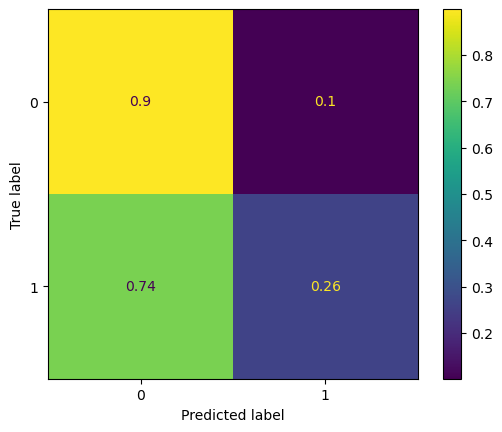

In [40]:
norm_conf_matrix = metrics.confusion_matrix(y_valid, y_pred, normalize = 'true')
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)
fig.plot() #  Creates the figure
plt.show() #  Displays the figure